In [66]:
del colors

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns


In [79]:
# Plots accuracy, ood and confusion for a given dataset
#colors = ["#244C5B", "#EBB57C", "#C2504C", "#439888"]
pastel_colors = ['#F9B9AC', '#FFDBBE', '#FFEDB3', '#EAECC6', '#C4DF9B', '#AEE1E1', '#B0D8FF', '#B7B6E5', '#D7B8FF', '#FFB9D3', '#FFC6A2', '#FFEBAF', '#D1E2E5', '#C2D1E9', '#D9C3E6', '#E1C3C3', '#F3B9B9', '#F8E9A1', '#B1E7B6', '#B2B7F2']

def plot_accuracies(dfs, labels, max_points, log=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    pastel_colors = ['#F9B9AC', '#FFDBBE', '#FFEDB3', '#EAECC6', '#C4DF9B', '#AEE1E1', '#B0D8FF', '#B7B6E5', '#D7B8FF', '#FFB9D3', '#FFC6A2', '#FFEBAF', '#D1E2E5', '#C2D1E9', '#D9C3E6', '#E1C3C3', '#F3B9B9', '#F8E9A1', '#B1E7B6', '#B2B7F2']
    
    for (df, label, color) in zip(dfs, labels, pastel_colors[::-1]):
        print(color)
        idx = df['accuracy'].values[:max_points] > 0
        ax[0].plot(df['accuracy'].values[:max_points][idx], label=label, alpha = 0.8, color = color, lw = 3)
        ax[0].set_title('Accuracy ↑')
        #for x in np.arange(0, max_points, 50):
        #   ax[0,0].axvline(x, color = "firebrick", ls = "--", linewidth = "0.5")
        ax[0].set_xlim(0)
        if log:
            ax[0,0].set_yscale("log")
        ax[0].grid(True)
        #ax[0,0].set_ylim(10e-2, 1.1)
        ax[0].legend()
        ax[0].tick_params( labelright=True)
        
        moving_avg = df['moving_avg'].values[:max_points]
        #moving_avg = [moving_avg[i:i+1000].mean() for i in range(len(moving_avg))]
        ax[1].plot(moving_avg, label=label, alpha = 0.8, color = color, lw = 3)
        ax[1].set_title('Moving Avg. Acc. ↑')
        ax[1].set_xlim(0)
        ax[1].set_ylim(0, 1.1)
        if log:
            ax[1,1].set_yscale("log")
        ax[1].legend()
        ax[1].grid(True)
        ax[1].tick_params( labelright=True)

def plot_OOD(dfs, labels, max_points, log=True):
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    
    for i, (df, label, color) in enumerate(zip(dfs, labels, pastel_colors)):
        print(color)

        ax[0].plot(df['ood'].values[-1], label=label, alpha = 0.8, color = color)
        ax[0].plot(df['type1_ood_error'].values[-1], label=label, alpha = 0.8, color = color )
        
        ax[0].set_title('OOD ↑')
        ax[0].set_ylim(0, 1.1)
        ax[0].set_xlim(0)
        ax[0].legend()
        ax[0].grid(True)
        ax[0].tick_params( labelright=True)

      
        


# Ordered

#B2B7F2
#B1E7B6


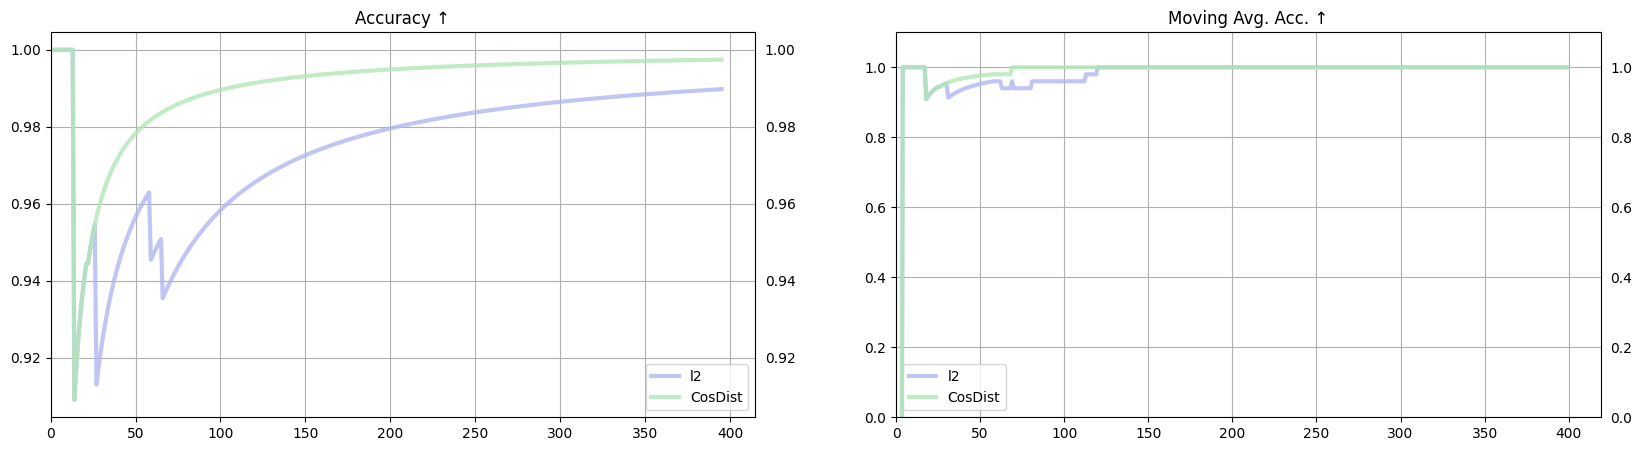

In [80]:
DATASET = 'Core50'
MODEL = 'openCLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine"]#, "inverse_cosine", "normalized_l2", "l1"]
LABELS = ["l2", "CosDist"]
PROCESSING_FRAMES = 1
THRESHOLDs = [18, 0.4, 1.8, 2.7] 
MAX_POINTS = 1000000000

SHUFFLED = 'shuffled'
PROBABILITY = '100'

dir_paths = [f"paper/results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_{SHUFFLED}_p{PROBABILITY}_slFalse/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
plot_accuracies(dfs, LABELS, MAX_POINTS, log=False)

# Shuffled

In [45]:
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine", "normalized_l2", "l1"]
PROCESSING_FRAMES = 30
THRESHOLDs = [6.7, 1.25, 1.8, 2.7] 
MAX_POINTS = 500

dir_paths = [f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
plot(dfs, DISTANCE_TYPEs, MAX_POINTS)

FileNotFoundError: [Errno 2] No such file or directory: 'results/CORE50_l2_30_CLIP_shuffled/metrics_6.70.csv'

# Accuracy vs Human interaction

In [ ]:
import pickle as pkl
import matplotlib.pyplot as plt
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPE = 'l2'
PROCESSING_FRAMES = 1
THRESHOLD = 6.7
MAX_POINTS = 500
accuracies = []
probabilities = [i*10 for i in range(11)]
for p in probabilities:
    path = f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled_p{p}/matrix_t6.70.pkl"
    with open(path, "rb") as f:
        m = pkl.load(f)
        accuracies.append(m.accuracy())
plt.plot(probabilities, accuracies, marker = ".", ls = "", ms = 10, color = "firebrick")
plt.ylim((0,1))
plt.grid()
plt.tick_params( labelright=True)
plt.xticks(probabilities)

In [ ]:
results/CORE50_l2_1_CLIP_shuffled_p60/matrix_t6.70.pkl